## Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 1

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Dataset
clean_data_path = "dataset/autos/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [3]:
df.groupby(['model'], as_index=False).mean()
pt1 = df[['yearOfRegistration', 'vehicleType']]
pt1.rename(columns={'yearOfRegistration': 'Ano de Registro'}, inplace=True)
pt1.head()

C:\Users\lucaa\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Ano de Registro,vehicleType
0,1993,Other
1,2011,coupe
2,2004,suv
3,2001,kleinwagen
4,2008,kleinwagen


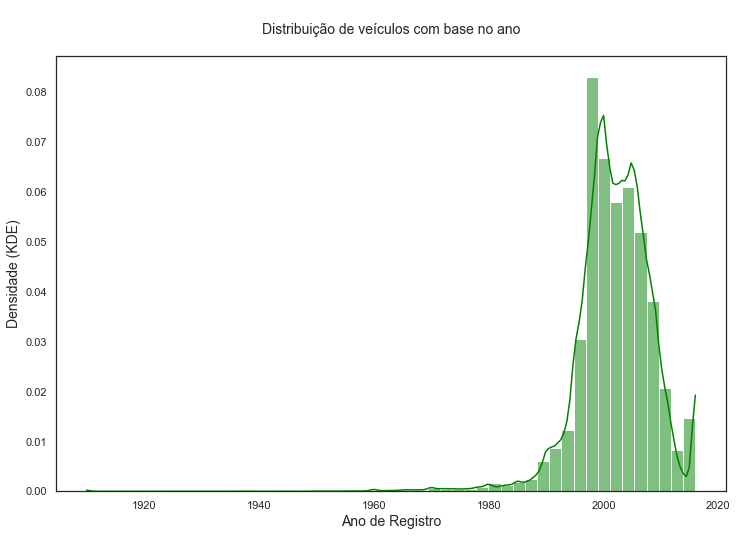

In [4]:
fontsize = 14
p, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Ano de Registro',  fontsize=fontsize)
ax1.set_ylabel('Densidade (KDE)',  fontsize=fontsize)
ax1.set_title('\nDistribuição de veículos com base no ano\n',  fontsize=fontsize)
sns.histplot(data=pt1, x='Ano de Registro', kde=True, stat='density', bins=50, color='green')
plt.show()

## Distribuição de Veículos com base no Ano de Registro

In [5]:
pgt2 = df[['vehicleType', 'price']]
pgt2 = pgt2.groupby(['vehicleType'], as_index=False).count().sort_values(by=['vehicleType'], ascending=True)
pgt2.rename(columns={'price': 'qtd'}, inplace=True)
pgt2

,vehicleType,qtd
0,Other,19447
1,andere,2908
2,bus,26833
3,cabrio,20388
4,coupe,16920
5,kleinwagen,69334
6,kombi,60195
7,limousine,84077
8,suv,13585


<ipython-input-12-0a11c6778255>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p2.show()


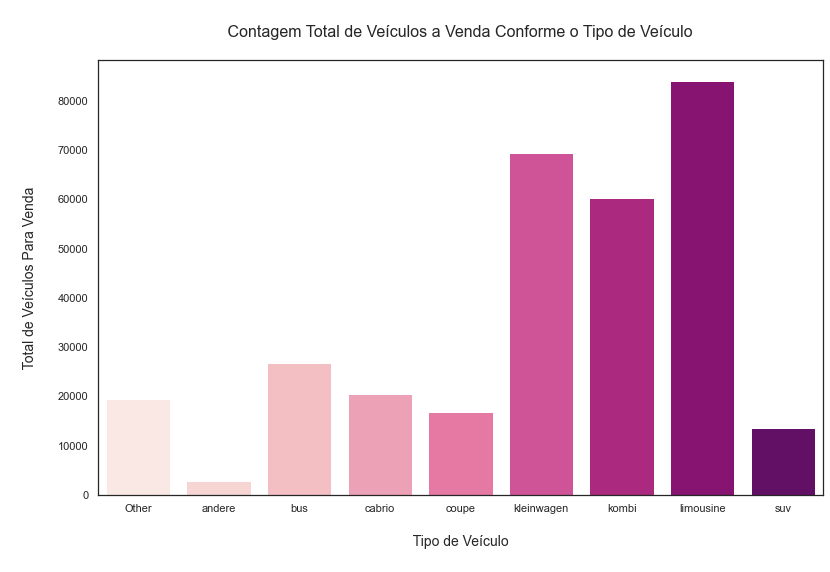

In [12]:
fontsize=14
p2, ax2 = plt.subplots(figsize=(13,8))
sns.set_style('white')
ax2 = sns.barplot(x=pgt2['vehicleType'], y=pgt2['qtd'], palette='RdPu')
ax2.set_ylabel('\n Total de Veículos Para Venda \n', fontsize=fontsize)
ax2.set_xlabel('\n Tipo de Veículo \n', fontsize=fontsize)
ax2.set_title('\n Contagem Total de Veículos a Venda Conforme o Tipo de Veículo \n', fontsize=16)

In [ ]:
# Salvando o plot
fig.savefig("plots/Analise1/vehicle-distribution.png")

## Variação da faixa de preço pelo tipo de veículo

<ipython-input-55-6a69e47c1808>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p3.show()


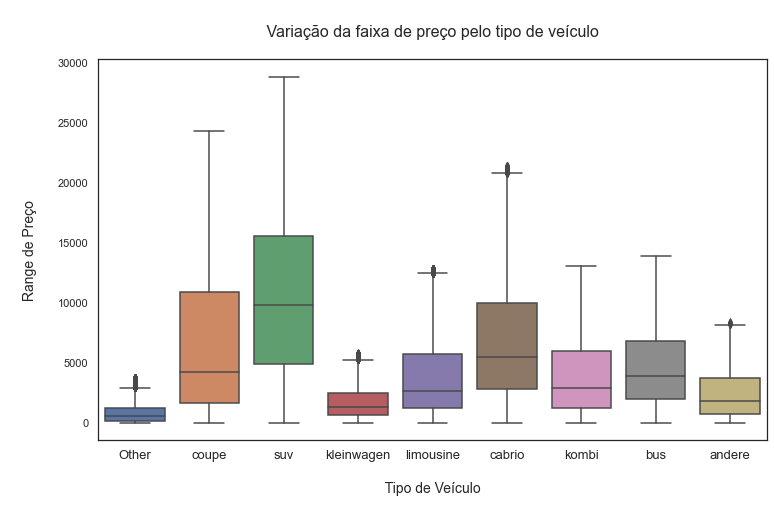

In [55]:
# Crie um Boxplot para avaliar os outliers
pgt3 = df[['vehicleType','price']]
p3, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x=pgt3['vehicleType'], y=pgt3['price'], ax=ax)
ax.set_title('\n Variação da faixa de preço pelo tipo de veículo \n', fontdict={'fontsize':16})
ax.set_ylabel('\n Range de Preço \n',  fontdict={'fontsize':14})
ax.set_xlabel('\n Tipo de Veículo \n',  fontdict={'fontsize':14})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=13)
p3.show()


In [ ]:
# Salvando o plot
fig.savefig("plots/Analise1/price-vehicleType-boxplot.png")

## Contagem total de veículos à venda conforme o tipo de veículo

In [59]:
pgt4 = df[['vehicleType','price']]
pgt4 = pgt4.groupby(['vehicleType'], as_index=False).count().sort_values(by='price', ascending=False)
pgt4

,vehicleType,price
7,limousine,84077
5,kleinwagen,69334
6,kombi,60195
2,bus,26833
3,cabrio,20388
0,Other,19447
4,coupe,16920
8,suv,13585
1,andere,2908


<ipython-input-62-0ad14cf0c314>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p4.show()


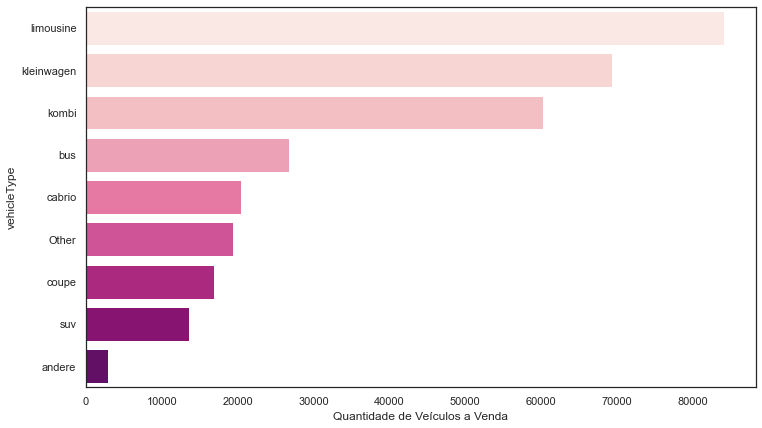

In [62]:
p4, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(x = pgt4['price'], y=pgt4['vehicleType'], orient='h', palette='RdPu')
ax.set_xlabel('Quantidade de Veículos a Venda')
p4.show()

In [ ]:
# Salvando o plot
g.savefig("plots/Analise1/count-vehicleType.png")